In [2]:
from collections import defaultdict
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import functools
from IPython.display import display, Markdown
import math
import os
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
import numpy as np
import pandas as pd
import dask.dataframe as dd
pd.plotting.register_matplotlib_converters()
import seaborn as sns
import scipy as sci
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import sympy as sym
import covsirphy as cs

In [22]:
example_data = cs.ExampleData(tau=1440, start_date="01Jan2020")
# No records has been registered
example_data.cleaned()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered


In [13]:
pop_data = cs.PopulationData(C:\Users\user\Documents\카카오톡 받은 파일\서울인구통계\locations_population.csv")
pop_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
0,NaN,Seoul,-,2020-09-04,9776000


In [31]:
jhu_data = cs.JHUData(r"C:\Users\user\Documents\카카오톡 받은 파일\서울인구통계\kr_regional_daily.csv")
ncov_df = jhu_data.cleaned()
ncov_df.tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
198,2020-09-02,Seoul,-,4062,1990,24,2048
199,2020-09-03,Seoul,-,4131,1996,24,2111
200,2020-09-04,Seoul,-,4201,2001,24,2176
201,2020-09-05,Seoul,-,4251,2006,25,2220
202,2020-09-06,Seoul,-,4314,2063,26,2225


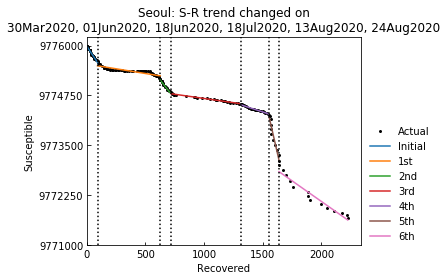

In [40]:
ita_scenario = cs.Scenario(jhu_data, pop_data, "Seoul")
ita_scenario.trend()

In [41]:
ita_scenario.summary()

,Type,Start,End,Population
1st,Past,30Mar2020,31May2020,9776000
2nd,Past,01Jun2020,17Jun2020,9776000
3rd,Past,18Jun2020,17Jul2020,9776000
4th,Past,18Jul2020,12Aug2020,9776000
5th,Past,13Aug2020,23Aug2020,9776000
6th,Past,24Aug2020,06Sep2020,9776000


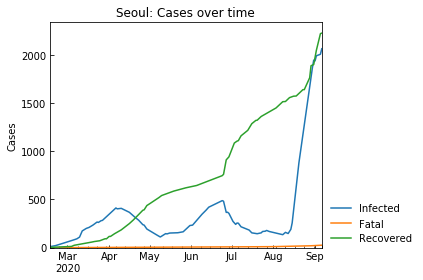

,Date,Confirmed,Infected,Fatal,Recovered
198,2020-09-02,4062,1990,24,2048
199,2020-09-03,4131,1996,24,2111
200,2020-09-04,4201,2001,24,2176
201,2020-09-05,4251,2006,25,2220
202,2020-09-06,4314,2063,26,2225


In [34]:
ita_scenario = cs.Scenario(jhu_data, pop_data, "Seoul")
ita_scenario.records().tail()

In [43]:
ita_scenario.estimate(cs.SIRF)



<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	6th phase (24Aug2020 - 06Sep2020): finished  230 trials in 0 min 33 sec
Completed optimization. Total: 3 min  1 sec


In [44]:
ita_scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],1/beta [day],alpha1 [-],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,30Mar2020,31May2020,9776000,SIR-F,0.33,0.019194,0.000059,0.004036,0.011781,480,5645,82,0.019,28,0.974603,605,1 min 1 sec
2nd,Past,01Jun2020,17Jun2020,9776000,SIR-F,3.68,0.000097,0.000002,0.020860,0.005660,480,184135,15,0.000,58,0.055241,652,1 min 1 sec
3rd,Past,18Jun2020,17Jul2020,9776000,SIR-F,0.49,0.000769,0.000157,0.010461,0.021025,480,2116,31,0.001,15,0.213706,632,1 min 1 sec
4th,Past,18Jul2020,12Aug2020,9776000,SIR-F,0.99,0.000570,0.000426,0.018013,0.017723,480,782,18,0.001,18,0.167305,638,1 min 1 sec
5th,Past,13Aug2020,23Aug2020,9776000,SIR-F,14.58,0.000746,0.000234,0.055709,0.003584,480,1423,5,0.001,93,0.315909,712,1 min 1 sec
6th,Past,24Aug2020,06Sep2020,9776000,SIR-F,2.30,0.003250,0.000083,0.019816,0.008512,480,4031,16,0.003,39,0.087779,230,0 min 33 sec
